In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import tracemalloc

In [2]:
file_path = r'C:\Users\Χριστόδουλος\Desktop\ML project\cleaned_energy_data.csv'
df = pd.read_csv(file_path)

In [3]:
df = df.drop(columns=["date"])
df = pd.get_dummies(df, columns=["day_type"], drop_first=True)

X = df.drop(columns=["Appliances"])
y = df["Appliances"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

C:\Users\Χριστόδουλος\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 3155.9907 - val_loss: 2531.5029
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3200.9575 - val_loss: 2365.8997
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3354.6211 - val_loss: 2159.9404
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2768.3042 - val_loss: 1910.6298
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2442.5227 - val_loss: 1619.0131
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2208.6477 - val_loss: 1293.0300
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1576.1742 - val_loss: 948.4081
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1299.6687 - val_loss: 610.6005
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1334.9161 - val_loss: 325.6459
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 998.7159 - val_loss: 145.7567
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 747.5137 - val_loss: 101.4035
Epoch 12/20
4/4 ━━━━━━━━━

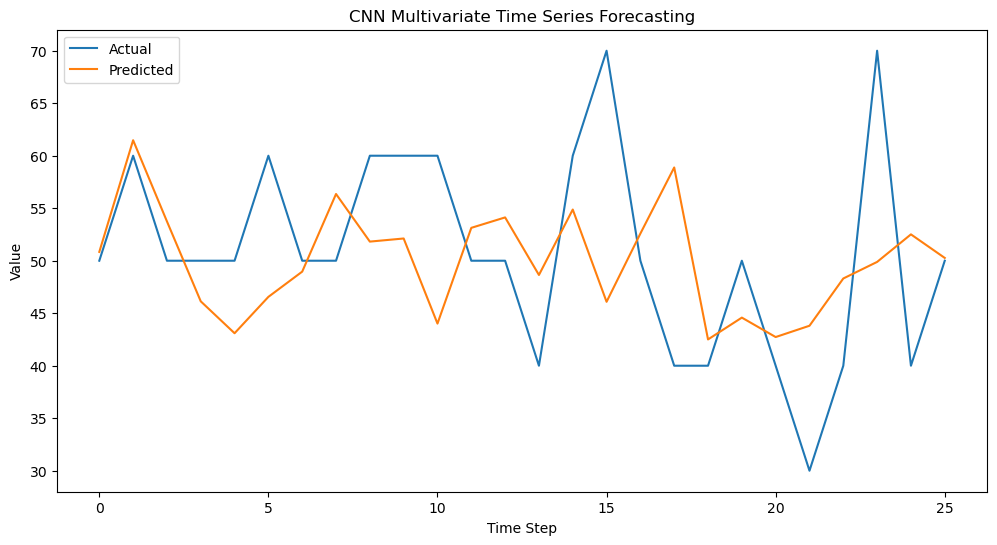

In [4]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

start_time = time.time()
tracemalloc.start()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')  
plt.plot(y_pred.flatten(), label='Predicted')
plt.title('CNN Multivariate Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

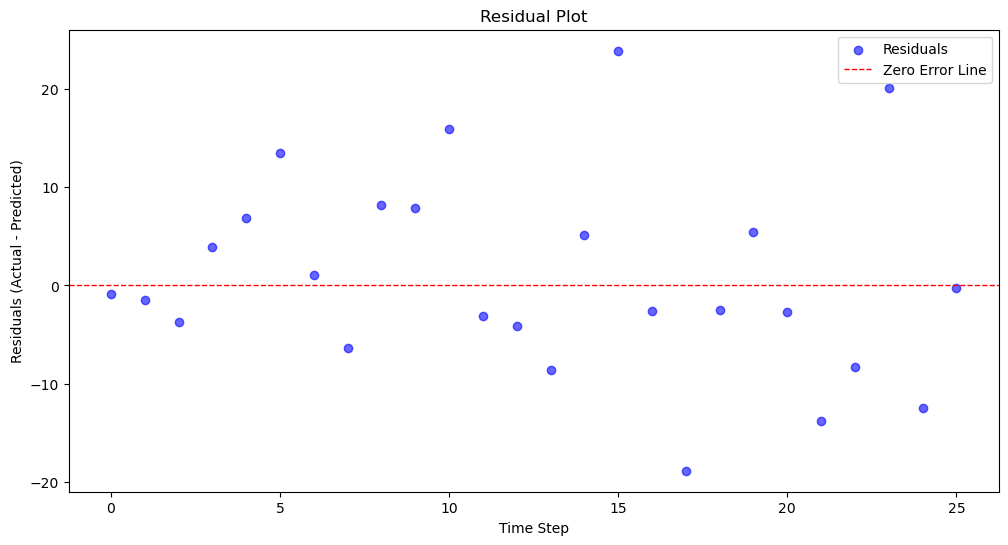

In [5]:
y_test = y_test.reshape(-1) if len(y_test.shape) > 1 else y_test
y_pred = y_pred.reshape(-1) if len(y_pred.shape) > 1 else y_pred

min_length = min(len(y_test), len(y_pred))
y_test_aligned = y_test[:min_length]
y_pred_aligned = y_pred[:min_length]

residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Error Line')
plt.title('Residual Plot')
plt.xlabel('Time Step')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

In [6]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)               
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100 
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"R² Score: {r2}")
print("Training time (s):", end_time - start_time)
print("Memory usage (Bytes):", current)

RMSE: 10.024990407312094
MAE: 7.760974443875826
MAPE: 15.624856117444159%
R² Score: -0.09577891101111091
Training time (s): 7.812043190002441
Memory usage (Bytes): 5421603


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
